<a href="https://colab.research.google.com/github/Hulk11/Stocks-Nifty-/blob/master/Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

Saving DAXI.csv to DAXI.csv
Saving DJIA 99-19.csv to DJIA 99-19.csv
Saving FTSE.csv to FTSE.csv
Saving hangseng 99-19.csv to hangseng 99-19.csv
Saving nasdaq 99-19.csv to nasdaq 99-19.csv
Saving Nifty2 07-19.csv to Nifty2 07-19.csv
Saving nikkei 99-19.csv to nikkei 99-19.csv
Saving SP500 99-19.csv to SP500 99-19.csv


In [0]:
stock_files = ["Nifty2 07-19.csv","DJIA 99-19.csv","hangseng 99-19.csv","nasdaq 99-19.csv","nikkei 99-19.csv","SP500 99-19.csv","DAXI.csv","FTSE.csv"]
stocks=[]
for fil in stock_files:
  stocks.append(pd.read_csv(fil))  

In [0]:
stock_indices = {0:'nifty',1:'djia',2:'hangseng',3:'nasdaq',4:'nikkei',5:'sp500',6:'aux',7:'ftse'}


In [0]:
# t = pd.read_csv("Nifty2 07-19.csv")
# t = t.drop(columns=["Open","Shares Traded","High","Low","Turnover (Rs. Cr)"])
# t['dif'] = t['Close'].diff(1)
# t = t.drop(columns=["Close"])
# stocks[3] = t
# stocks[3].head()
# stocks[7]["Close"] = stocks[7]["Open"]

# For Asian markets which starts just before Indian market
stocks[4]["Close"] = stocks[4]["Open"]   # Japan
stocks[2]["Close"] = stocks[2]["Open"]   # HK
stocks[6]["Close"] = stocks[6]["Open"]   # Australia



# Dropping irrelevant data
stocks[0] = stocks[0].drop(columns=["Open","Shares Traded","High","Low","Turnover (Rs. Cr)"])
stocks[7] = stocks[7].drop(columns=["Open","Vol.","High","Low","Change %"])
for i in range(1,8):
  if(i!=7):
    stocks[i] = stocks[i].drop(columns=["Open","High","Low","Adj Close","Volume"])
# stocks[8] = stocks[8].drop(columns=["Open","High","Low","Adj Close","Volume"])  

In [0]:

for stock in stocks:
  stock['Close'] = stock['Close'].replace([np.inf, -np.inf], np.nan)
  

In [0]:
# stocks[4]['Close'] = stocks[4]['Close'].replace([np.inf, -np.inf], np.nan)
# stocks[4]['Close'] = stocks[4]['Close'].fillna(stocks[4]['Close'].mode()[0])
for stock in stocks:
  stock['Close'] = stock['Close'].fillna(stock['Close'].median())
# stocks[4]['Close'].mode()[0]

In [0]:
stocks[8].info()

In [0]:
# adding new feature with various deltas 

def build_data(delta):
  stocks_1 = stocks

  for k,v in stock_indices.items():
#     print(v)
    stocks_1[k][v] = stocks_1[k]['Close'].diff(delta)

  # Normalization 
  i=0
  for stock in stocks_1:
    stock[stock_indices[i]] = (stock['Close'] - stock[stock_indices[i]])/stock[stock_indices[i]]
    i = i+1  
  for k,v in stock_indices.items():
    stocks_1[k][v] = stocks_1[k][v].replace([np.inf, -np.inf], np.nan)
    stocks_1[k][v] = stocks_1[k][v].fillna(stocks_1[k][v].median())

  # Preparing train data 
  fin = pd.merge(stocks_1[0], stocks_1[1], on="Date")
  for i in range(1,7):
    fin = pd.merge(fin, stocks_1[i+1], on="Date")
  fin = fin.drop(columns=['Close_x','Close_y','Date'])
#   fin.info()  
  return fin
  

In [0]:
# # Adding new feature with delta = 30
# delta = 30
# stocks_30 = stocks

# for k,v in stock_indices.items():
#   print(v)
#   stocks_30[k][v] = stocks_30[k]['Close'].diff(delta)

# # Filling Nan values
# for k,v in stock_indices.items():
#   stocks_30[k][v] = stocks_30[k][v].fillna(stocks_30[k][v].median())  

In [0]:
# Filling null values with mean
# for stock in stocks:
#   stock = stock.fillna(stock['dif'].mean())

# stocks[1] = stocks[1].fillna(stocks[1]['djia'].median())
# stocks[3] = stocks[3].fillna(stocks[3]['nasdaq'].median())
# stocks[2] = stocks[2].fillna(stocks[2]['hangseng'].median())
# stocks[4] = stocks[4].fillna(stocks[4]['nikkei'].median())
# stocks[5] = stocks[5].fillna(stocks[5]['sp500'].median())
# for stock in stocks:
#   stock = stock.replace([np.inf, -np.inf], np.nan)
#   print()


# stocks[0] = stocks[0].fillna(stocks[0]['nifty'].mean())

In [0]:
# print(stocks[0]['nifty'].mean())
stocks_30[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5124 entries, 0 to 5123
Data columns (total 3 columns):
Date     5124 non-null object
Close    5124 non-null float64
nifty    5124 non-null float64
dtypes: float64(2), object(1)
memory usage: 120.2+ KB


In [0]:
# Normalization 
i=0
for stock in stocks_30:
  stock[stock_indices[i]] = (stock['Close'] - stock[stock_indices[i]])/stock[stock_indices[i]]
  i = i+1
  

In [0]:
for k,v in stock_indices.items():
  stocks_30[k][v] = stocks_30[k][v].replace([np.inf, -np.inf], np.nan)
  stocks_30[k][v] = stocks_30[k][v].fillna(stocks_30[k][v].median())
#   stocks_30[k][v] = stocks_30[k][v].dropna()
# stocks[4].isna().sum()  

Date      0
Close     0
nikkei    0
dtype: int64

In [0]:
# Preparing train data 
# fin = pd.merge(stocks_30[0], stocks_30[1], on="Date")

# for i in range(1,7):
#   fin = pd.merge(fin, stocks_30[i+1], on="Date")  
# fin = fin.drop(columns=['Close_x','Close_y','Date'])
# fin.info()
# print(build_data(30).info())
# nifty.plot.line(x="Date",y="dif")

In [0]:
fin.head()

In [0]:
# for st in stocks:
#   dat = pd.read_csv(st)
#   # djia.head()
#   dat.plot.line(x="Date",y="Close",title=st)

In [0]:
fin.corr(method ='pearson')
fin.info()
# fin.plot.scatter(x="nifty",y="nasdaq")
# import matplotlib.pyplot as plt
# plt.matshow(fin.corr(method ='pearson'))
# plt.show()

In [0]:
# All Binary features 
fin_bin = fin
# fin_bin = fin_bin.drop(columns=['Date'])
fin_bin[fin_bin < 0] = 0
# fin_bin[fin_bin == 0] = 1
fin_bin[fin_bin > 0] = 1
fin_bin.head()
# fin_abs['nikkei']

,nifty,djia,hangseng,nasdaq,nikkei,sp500,aux,ftse
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [0]:
fin_abs = build_data(1)

fin_abs.corr()
# fin_abs = fin_abs.drop(columns=['Date'])
# fin_abs['nikkei'].mean()
# fin_abs['nikkei'] = fin_abs['nikkei'].replace([np.inf, -np.inf], np.nan)
# fin_abs['nikkei'] = fin_abs['nikkei'].fillna(stocks[1]['djia'].mode())

,nifty,djia,hangseng,nasdaq,nikkei,sp500,aux,ftse
nifty,1.000000,-0.002106,0.000572,-0.004343,-0.007434,0.013070,0.001328,0.002453
djia,-0.002106,1.000000,0.000277,-0.000180,0.000640,-0.000201,0.000958,-0.001270
hangseng,0.000572,0.000277,1.000000,0.000916,0.006239,0.000237,0.001673,0.000385
nasdaq,-0.004343,-0.000180,0.000916,1.000000,0.003506,-0.002079,0.007296,0.003391
nikkei,-0.007434,0.000640,0.006239,0.003506,1.000000,0.000063,0.004472,0.005075
sp500,0.013070,-0.000201,0.000237,-0.002079,0.000063,1.000000,0.005766,-0.004314
aux,0.001328,0.000958,0.001673,0.007296,0.004472,0.005766,1.000000,-0.002074
ftse,0.002453,-0.001270,0.000385,0.003391,0.005075,-0.004314,-0.002074,1.000000


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn import svm
import statistics

In [0]:
## Train and Test data
# data - set the training data
# output - the feature you want to predict
# include - the features you want to include while prediction
def train_test(data,output,include):
  y = data[output]
  type(y)
  y = y.mask(y>0,1)
  y = y.mask(y<0,0)
#   train = fin_abs.drop(columns = ["nifty","ftse","nikkei"])
#   exclude.append(output)
  train = data.drop(columns = [output])
  train = train[include]
  print(type(train))
#   print(train.head())
  return train_test_split(train, y, test_size=0.35, random_state=42)


# X_train, X_test, Y_train, y_test = train_test(fin_abs,"nifty",["nasdaq"])
# df.replace([np.inf, -np.inf], np.nan)
# X_train.info()

In [0]:
score_set = pd.DataFrame(columns=['Feature', 'LogisticRegression', 'Random Forest','KNN','XGBoost','SVM'])
count = 0

In [0]:

def store_scores(train_data,feature,label,data,counter):
#   global count
  temp_score_list = []

  # Creating test-train data split
  X_train, X_test, Y_train, y_test = train_test(train_data,"nifty",feature)
  
  
  # Predictions using various classifiers and storing the best one for each case
  logreg = LogisticRegression()
  logreg.fit(X_train,Y_train)
  prediction = logreg.predict(X_test)
  scores = cross_val_score(logreg, X_train, Y_train, cv=10,scoring='accuracy')
  # print ("Logistic Regression: %.2f%%" % (metrics.accuracy_score(y_test, prediction)*100.0))
#   temp_score_list.append(metrics.accuracy_score(y_test, prediction))
  temp_score_list.append(statistics.mean(scores))
  
  
  
  rf = RandomForestClassifier(n_estimators=30,criterion='entropy',max_depth=10)
  rf.fit(X_train,Y_train)
  ypred = rf.predict(X_test)
  scores = cross_val_score(rf, X_train, Y_train, cv=10,scoring='accuracy')

  # print ("Random Forest: %.2f%%" % (metrics.accuracy_score(y_test,ypred )*100.0))
#   temp_score_list.append(metrics.accuracy_score(y_test, ypred))
  temp_score_list.append(statistics.mean(scores))
  
  
  knn = KNeighborsClassifier(n_neighbors=12)
  knn.fit(X_train, Y_train)
  y_pred = knn.predict(X_test)
  scores = cross_val_score(knn, X_train, Y_train, cv=10,scoring='accuracy')
  
  # print ("KNN: %.2f%%" % (metrics.accuracy_score(y_test,y_pred)*100.0))
#   temp_score_list.append(metrics.accuracy_score(y_test, y_pred))
  temp_score_list.append(statistics.mean(scores))
  
  
  model = XGBClassifier()
  model.fit(X_train, Y_train)
  y_pred = model.predict(X_test)
  # predictions = [round(value) for value in y_pred]
  accuracy = metrics.accuracy_score(y_test, y_pred)
  scores = cross_val_score(model, X_train, Y_train, cv=10,scoring='accuracy')
  
  # print("XGBoost Accuracy: %.2f%%" % (accuracy * 100.0))
#   temp_score_list.append(accuracy)
  temp_score_list.append(statistics.mean(scores))
  
  
  clf = svm.SVC(gamma='scale',decision_function_shape='ovo')
  clf.fit(X_train, Y_train) 
  y_pred = clf.predict(X_test)
  scores = cross_val_score(clf, X_train, Y_train, cv=10,scoring='accuracy')
  
  accuracy = metrics.accuracy_score(y_test, y_pred)
#   temp_score_list.append(accuracy)
  temp_score_list.append(statistics.mean(scores))
  
  
  # Adding to score_set df:
  data.loc[counter] = [label] + temp_score_list
  counter+=1
  
  #   scores = cross_val_score(clf, X_train, Y_train, cv=10,scoring='accuracy')
  # print(scores)
  # print("SVM Accuracy: %.2f%%" % (accuracy * 100.0))



In [0]:
for k,v in stock_indices.items():
  if(v!="nifty"):
    store_scores(build_data(30),[v],v,score_set,count)
score_set

    Feature  LogisticRegression  Random Forest       KNN   XGBoost       SVM
0      djia            0.718837       0.718837  0.608726  0.718837  0.718837
1  hangseng            0.744460       0.744460  0.744460  0.744460  0.744460
2    nasdaq            0.703601       0.703601  0.609874  0.703601  0.703601
3    nikkei            0.658587       0.658587  0.658587  0.658587  0.658587
4     sp500            0.724377       0.724377  0.724377  0.724377  0.724377
5       aux            0.729224       0.729224  0.729224  0.729224  0.729224
6      ftse            0.608726       0.608726  0.608726  0.608726  0.608726


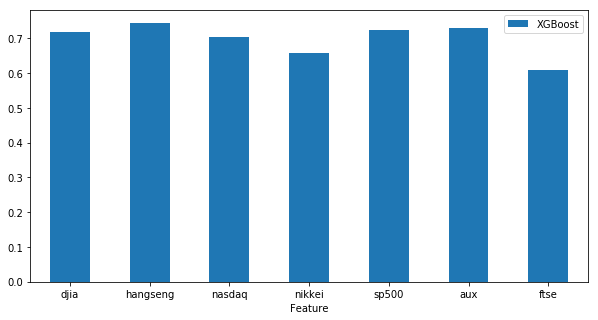

In [0]:
ax = score_set.plot.bar(x='Feature', y='XGBoost', rot=0,figsize=(10,5))

In [0]:
combined_score = pd.DataFrame(columns=['Delta Values', 'LogisticRegression', 'Random Forest','KNN','XGBoost','SVM'])
deltas = [1,10,20,30,40,50]
i=0
for delta in deltas:
  store_scores(build_data(delta),["nasdaq","ftse","hangseng","aux","nikkei","sp500","djia"],"Delta"+str(delta),combined_score,i)
  i+=1
combined_score

nifty
djia
hangseng
nasdaq
nikkei
sp500
aux
ftse
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4124 entries, 0 to 4123
Data columns (total 8 columns):
nifty       4124 non-null float64
djia        4124 non-null float64
hangseng    4124 non-null float64
nasdaq      4124 non-null float64
nikkei      4124 non-null float64
sp500       4124 non-null float64
aux         4124 non-null float64
ftse        4124 non-null float64
dtypes: float64(8)
memory usage: 290.0 KB
<class 'pandas.core.frame.DataFrame'>
nifty
djia
hangseng
nasdaq
nikkei
sp500
aux
ftse
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4124 entries, 0 to 4123
Data columns (total 8 columns):
nifty       4124 non-null float64
djia        4124 non-null float64
hangseng    4124 non-null float64
nasdaq      4124 non-null float64
nikkei      4124 non-null float64
sp500       4124 non-null float64
aux         4124 non-null float64
ftse        4124 non-null float64
dtypes: float64(8)
memory usage: 290.0 KB
<class 'pandas.core.fram

,Delta Values,LogisticRegression,Random Forest,KNN,XGBoost,SVM
0,Delta1,0.497922,0.597645,0.554017,0.610111,0.501385
1,Delta10,0.612188,0.738920,0.671053,0.740305,0.612188
2,Delta20,0.592105,0.774931,0.711219,0.745152,0.592798
3,Delta30,0.608726,0.795706,0.715374,0.782548,0.610111
4,Delta40,0.619114,0.822715,0.768698,0.801247,0.614958
5,Delta50,0.624654,0.829640,0.747922,0.795706,0.626039


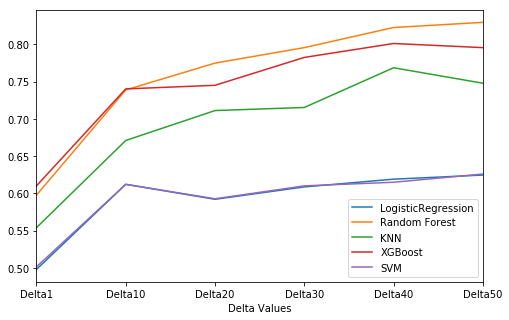

In [0]:
combined_score.plot.line(x="Delta Values",figsize=(8,5))

In [0]:
# Ensemble Stacking
X_train, X_test, Y_train, y_test = train_test(build_data(30),"nifty",feature) 
rfc = RandomForestClassifier(n_estimators=30,criterion='entropy',max_depth=10)
logreg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=12)
xgb = XGBClassifier()
clf = svm.SVC(gamma='scale',decision_function_shape='ovo')


In [0]:

rf = RandomForestClassifier(n_estimators=30,criterion='entropy',max_depth=10)
rf.fit(X_train,Y_train)
ypred = rf.predict(X_test)
print ("Random Forest: %.2f%%" % (metrics.accuracy_score(y_test,ypred )*100.0))

Random Forest: 69.86%


In [0]:

knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
print ("KNN: %.2f%%" % (metrics.accuracy_score(y_test,y_pred)*100.0))
# knn.score(X_test, y_test)

KNN: 70.29%


In [0]:

model = XGBClassifier()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
# predictions = [round(value) for value in y_pred]
accuracy = metrics.accuracy_score(y_test, y_pred)
print("XGBoost Accuracy: %.2f%%" % (accuracy * 100.0))

XGBoost Accuracy: 70.58%


In [0]:

clf = svm.SVC(gamma='scale',decision_function_shape='ovo')
clf.fit(X_train, Y_train) 
y_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
scores = cross_val_score(clf, X_train, Y_train, cv=10,scoring='accuracy')
print(scores)
print("SVM Accuracy: %.2f%%" % (accuracy * 100.0))

[0.62162162 0.62162162 0.62162162 0.62403101 0.62403101 0.62403101
 0.62015504 0.62403101 0.62256809 0.62256809]
SVM Accuracy: 61.51%
